In [111]:
# coding=UTF-8 #防止中文注释出错

import csv
from datetime import datetime
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd 
import statsmodels.api as sm

#显示宋体
my_font = fm.FontProperties(fname='C:\Windows\Fonts\simsun.ttc', size=15)
legend_font = fm.FontProperties(fname='C:\Windows\Fonts\simsun.ttc', size=10)

In [112]:
filename = ['80-05-10', '65-1-10', '50-2-10', '50-1-10', '50-1-5', '80-1-1', '50-05-1','65-05-5', '80-2-5', '50-2-10-1', '65-2-2']
w_f =[0.062, 0.084, 0.086, 0.081, 0.093, 0.069, 0.08, 0.075, 0.086, 0.071, 0.054]
w_0 = [0.415, 0.416, 0.428, 0.442, 0.445, 0.411, 0.433, 0.498, 0.439, 0.483, 0.446]
m_0_test = [609.8, 595.3, 537.1, 584.5, 326.0, 105.3, 106.1, 327.4, 316.6]
m_0f, m_0 = [], [] 

In [113]:
print( len(filename), len(w_f), len(w_0), len(m_0_test) )

(11, 11, 11, 9)


In [114]:
data = pd.DataFrame()
for i in range(len(filename)):
    df = pd.read_csv(filename[i]+'.csv')

    # w_0 = df.iloc[0,2]-m_0 / df.iloc
    #w_0 = 0.415
    #m_0 = df.iloc[0,2] - w_0 * df.iloc[0,2]
    #w_f = 0.062
    m_0f.append(df.iloc[len(df)-1,2] - w_f[i] * df.iloc[len(df)-1,2])
    m_0.append(df.iloc[0,2] - w_0[i] * df.iloc[0,2])
    m = m_0f
    w_t = (df.iloc[:,2]-m[i]) / df.iloc[:,2] 
    dr = [0] + [(df.iloc[j,2] - df.iloc[j+1,2]) / (30*m[i]) for j in range(len(w_t)-1) ] 
    MR = w_t / w_t[0] 

    #t = np.arange(len(dr1))*0.5
    data0 = pd.DataFrame({'dr'+str(i): dr, 'w_t'+str(i): w_t, 'MR'+str(i): MR} )
    data = pd.concat([data, data0], axis=1)

data['time']=np.arange(len(data)) * 0.5

In [115]:
data.head()

,MR0,dr0,w_t0,MR1,dr1,w_t1,MR2,dr2,w_t2,MR3,...,MR8,dr8,w_t8,MR9,dr9,w_t9,MR10,dr10,w_t10,time
0,1.000000,0.000000,0.435417,1.000000,0.000000,0.423865,1.000000,0.000000,0.476374,1.000000,...,1.000000,0.000000,0.445878,1.000000,0.000000,0.437013,1.000000,0.000000,0.438956,0.0
1,0.908254,0.003901,0.395469,0.903853,0.003822,0.383111,0.797292,0.009912,0.379809,0.943015,...,0.893621,0.004743,0.398446,0.935028,0.002843,0.408619,0.887811,0.004794,0.389710,0.5
2,0.828474,0.002996,0.360732,0.852939,0.001826,0.361531,0.745829,0.002044,0.355294,0.899456,...,0.807684,0.003318,0.360129,0.893202,0.001690,0.390341,0.816169,0.002677,0.358263,1.0
3,0.764708,0.002170,0.332967,0.786102,0.002218,0.333201,0.707192,0.001435,0.336888,0.860424,...,0.718327,0.003054,0.320286,0.843771,0.001871,0.368739,0.756726,0.002029,0.332170,1.5
4,0.696569,0.002128,0.303298,0.727524,0.001795,0.308372,0.665300,0.001469,0.316932,0.820383,...,0.655056,0.001954,0.292075,0.801281,0.001509,0.350170,0.699999,0.001794,0.307269,2.0


In [172]:
df_results = pd.DataFrame()
for i in range(len(filename)):
    data_new = data.loc[:,['w_t'+str(i),'time']]
    data_new.dropna(axis='index', how='any', inplace=True)
    x = data_new['time']
    y = data_new['w_t'+str(i)]
    X = np.column_stack((x, x**2)) #创建一个 k×2 的 array，两列分别为 x1 和 x2。我们需要 x2 为 x1 的平方
    X = sm.add_constant(X) #使用 sm.add_constant() 在 array 上加入一列常项 1。
    model = sm.OLS(y,X) #在反应变量和回归变量上使用 OLS() 函数
    results = model.fit() # 获取拟合结果
    y_fitted = results.fittedvalues
    df_results0 = pd.DataFrame({'y'+str(i): y, 'y_fitted'+str(i): y_fitted})
    df_results = pd.concat([df_results, df_results0], axis=1)
    
df_results['time'] = np.arange(len(df_results))*0.5

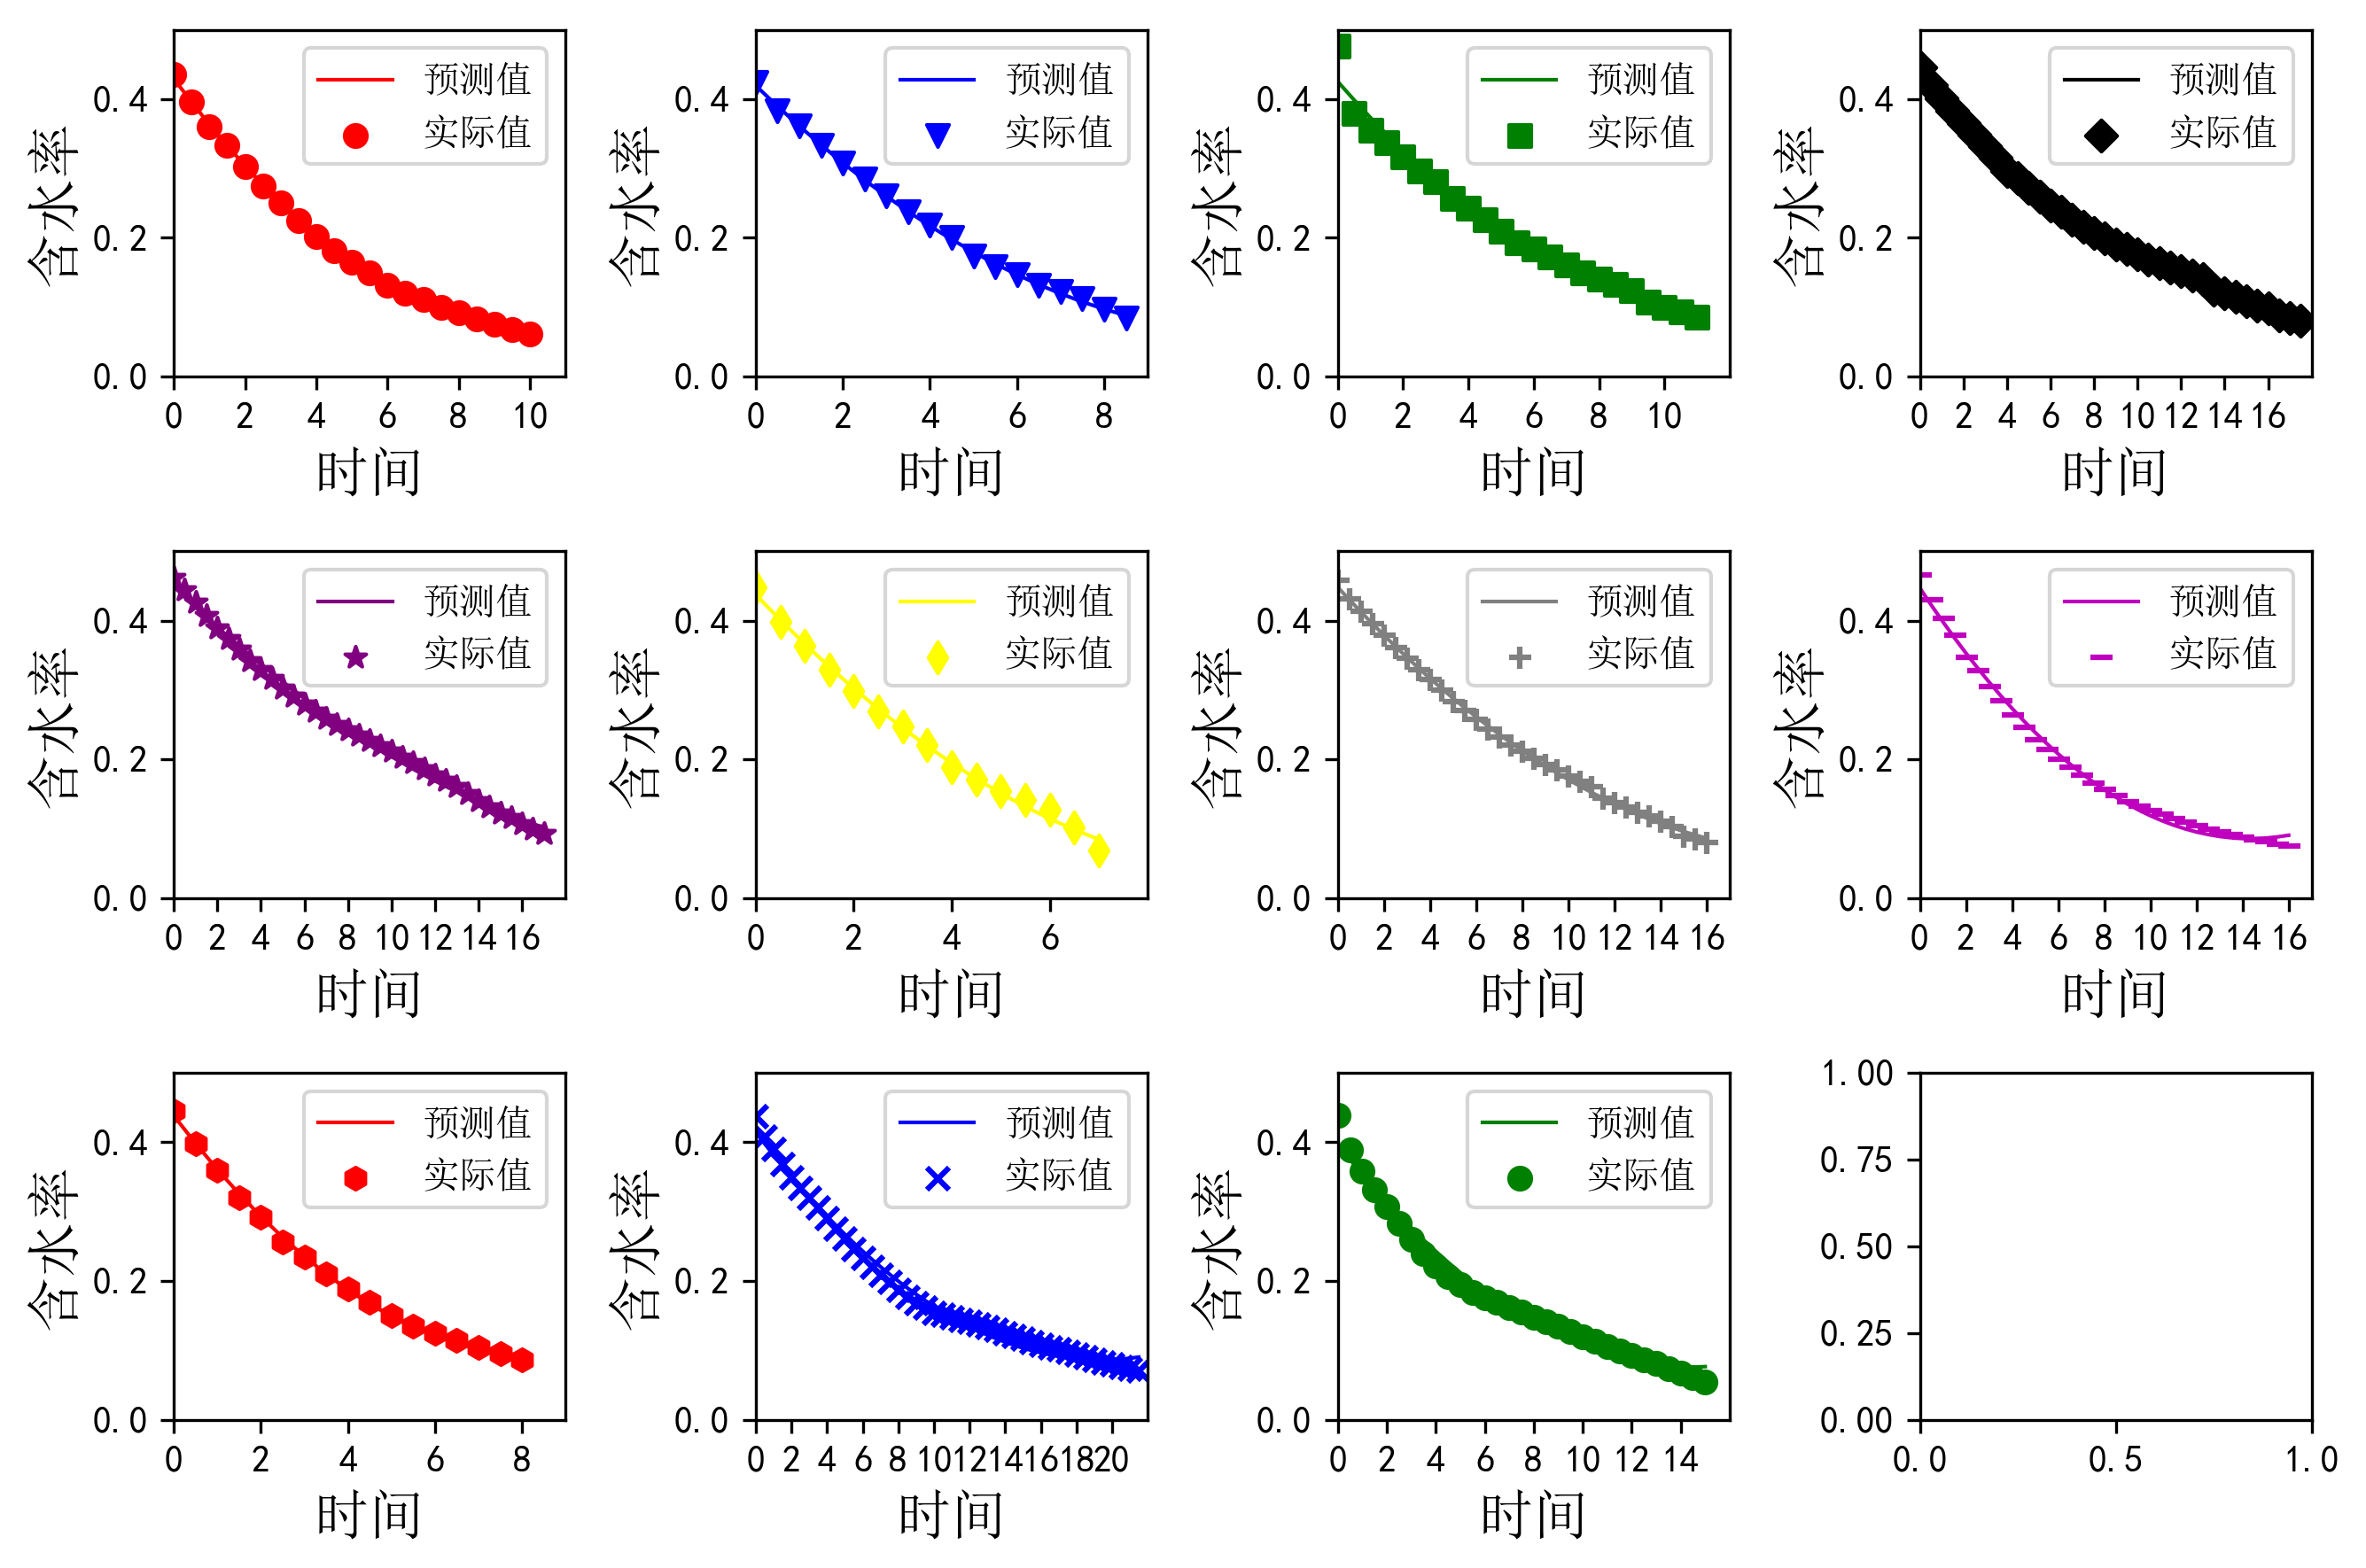

In [176]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 配置图形
color = ['red', 'blue', 'green', 'black', 'purple', 'yellow', 'grey', 'm'] * 2
marker = ['o', 'v', 's', 'D', '*', 'd', '+', '_', 'h', 'x'] * 2

n_rows = 3
n_cols = 4
fig,axes = plt.subplots(n_rows, n_cols, dpi=300, figsize =(9,6))
for row_num in range(n_rows):
    for col_num in range(n_cols):
        ax = axes[row_num][col_num]
        i = row_num * n_cols + col_num
        if i==11:
            break
        new = df_results.loc[:, ['time', 'y'+str(i), 'y_fitted'+str(i)]]
        new.dropna(axis='index', how='any', inplace=True)
       
        ax.scatter(new['time'], new['y'+str(i)], c=color[i], label=u'实际值', marker=marker[i])
        ax.plot(new['time'], new['y_fitted'+str(i)], c=color[i], label=u'预测值', linewidth=1.0, linestyle='-')
        
        ax.legend(prop=(legend_font) )
        ax.set_xlim( 0, np.ceil(len(new)*0.5) )
        ax.set_ylim(0, 0.5)
        ax.set_xticks(np.arange(0, np.ceil(len(new)*0.5), 2) )
        ax.set_xlabel(u'时间', fontproperties=my_font)
        ax.set_ylabel(u'含水率', fontproperties=my_font)
fig.tight_layout()
plt.savefig('subplot-watercontent.png')
plt.show()

In [177]:
df_results.loc[:,['y7','y_fitted7']]

,y7,y_fitted7
0,0.466301,0.447031
1,0.430266,0.422282
2,0.403552,0.398412
3,0.379147,0.375420
4,0.346660,0.353306
5,0.327841,0.332070
6,0.305491,0.311713
7,0.284792,0.292234
8,0.264424,0.273634
9,0.246571,0.255912
